In [46]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
may = pd.read_csv('2018-04-26_through_2018-05-26.csv', sep='\t')
june = pd.read_csv('2018-05-27_through_2018-06-26.csv', sep='\t')
july = pd.read_csv('2018-06-27_through_2018-07-27.csv', sep='\t')
august = pd.read_csv('2018-07-28_through_2018-08-26.csv', sep='\t')
september = pd.read_csv('2018-08-27_through_2018-09-26.csv', sep='\t')
october = pd.read_csv('2018-09-27_through_2018-10-27.csv', sep='\t')
november = pd.read_csv('2018-10-28_through-2018-11-27.csv', sep='\t')
december = pd.read_csv('2018-11-28_through_2018-12-28.csv', sep='\t')

In [3]:
def drop_rows():
    june.drop(range(102, 107), inplace=True)
    june.reset_index(inplace=True, drop=True)
    november.drop(range(120, 133), inplace=True)
    november.drop(range(142, 156), inplace=True)
    november.drop(range(165, 178), inplace=True)
    november.drop(range(187, 190), inplace=True)
    november.drop(range(199, 208), inplace=True)
    november.drop(range(226, 233), inplace=True)
    november.drop(range(242, 258), inplace=True)
    november.reset_index(inplace=True, drop=True)

def calories_in_dataframe(df, start, finish):
    """Returns a DataFrame of dates and calories consumed."""
    date = []
    calories_in = []
    for i in df.Foods.loc[start:finish].str.split(','):
        date.append(i[0])
    #     print(date)
        calories_in.append(i[1])
    #     print(calories_in)
    date_calories_in = pd.DataFrame({'date':date, 'calories_in':calories_in})
    return date_calories_in

def fitness_data_dataframe(df, start, finish):
    """Returns a DataFrame of fitness data."""
    date = []
    cals_burned = []
    steps = []
    dist = []
    floors = []
    sedentary = []
    lightly_active = []
    fairly_active = []
    very_active = []
    activity_calories = []
    for i in df.Foods.loc[start:finish].str.split(',"'):
#         date.append(i[0])
        cals_burned.append(i[1])
        steps.append(i[2])
        dist.append(i[3])
        floors.append(i[4])
        sedentary.append(i[5])
        lightly_active.append(i[6])
        fairly_active.append(i[7])
        very_active.append(i[8])
        activity_calories.append(i[9])
    fitness_data = pd.DataFrame({'calories_burned':cals_burned, 'steps':steps, # date removed
                             'distance':dist, 'floors':floors, 'minutes_sedentary':sedentary, 
                             'minutes_lightly_active':lightly_active, 
                             'minutes_fairly_active':fairly_active, 
                             'minutes_very_active':very_active, 'activity_calories':activity_calories})   
    
    return fitness_data

def make_log_columns(df, column_name, row_to_start_at):
    """Used to make logs DataFrame. Goes through each log and grabs the required data."""
    for i in df.Foods.loc[row_to_start_at::9].str.split(',"'):
        column_name.append(i[2])

def logs_dataframe(df, first_calories_log):
    """Returns a DataFrame of log data."""
    calories = []
    make_log_columns(df, calories, first_calories_log)
    fat = []
    make_log_columns(df, fat, first_calories_log+1)
    fiber = []
    make_log_columns(df, fiber, first_calories_log+2)
    carbs = []
    make_log_columns(df, carbs, first_calories_log+3)
    sodium = []
    make_log_columns(df, sodium, first_calories_log+4)
    protein = []
    make_log_columns(df, protein, first_calories_log+5)
    water = []
    make_log_columns(df, water, first_calories_log+6)
    
    may_logs = pd.DataFrame({'calories':calories, 'fat (g)':fat, 'fiber (g)':fiber, 'carbs (g)':carbs, 
                             'sodium (mg)':sodium, 'protein (g)':protein, 'water (fl oz)':water})
    
    return may_logs

def create_month_dataframe(df, cals_start, cals_finish, fitness_start, fitness_finish, calories_log_start):
    calories_df = calories_in_dataframe(df=df, start=cals_start, finish=cals_finish)
    fitness_df = fitness_data_dataframe(df=df, start=fitness_start, finish=fitness_finish)
    logs_df = logs_dataframe(df=df, first_calories_log=calories_log_start)
    month_df = pd.concat([calories_df, fitness_df, logs_df], axis=1)
    return month_df

def create_all_dataframes():
    may_df = create_month_dataframe(may, 1, 31, 34, 64, 67)
    june_df = create_month_dataframe(june, 1, 31, 34, 64, 67) # need to delete rows 102 through 106
    july_df = create_month_dataframe(july, 1, 31, 34, 64, 67)
    august_df = create_month_dataframe(august, 1, 30, 33, 62, 65) # one less day, need to adjust
    september_df = create_month_dataframe(september, 1, 31, 34, 64, 67)
    october_df = create_month_dataframe(october, 1, 31, 34, 64, 67)
    november_df = create_month_dataframe(november, 1, 31, 34, 64, 67) # need to delete multiple rows
    december_df = create_month_dataframe(december, 1, 31, 34, 42, 45) # fitness data doesn't have full range of days
    return may_df, june_df, july_df, august_df, september_df, october_df, november_df, december_df
    
def string_to_num(df, column):
    new_series = []
    for i, row in enumerate(df[column]):
        new_row = []
        if type(row) == float:
                new_series.append(row)
                continue
        for char in row:
            if char == '.':
                new_row.append(char)
                continue
            if char.isdigit():
                new_row.append(char)
            if pd.isna(df[column][i]):
                continue
        new_series.append(''.join(new_row))
    df[column] = new_series
    
def only_numbers(df):
    cols = df.drop(columns='date').columns
    for col in cols:
        string_to_num(df, col)
        
def only_numbers_dataframe(may, june, july, august, sept, october, nov, dec):
    only_numbers(may)
    only_numbers(june)
    only_numbers(july)
    only_numbers(august)
    only_numbers(sept)
    only_numbers(october)
    only_numbers(nov)
    only_numbers(dec)
    
def correct_dtypes(df):
    cols = df.drop(columns='date').columns
    for col in cols:
        df[col] = df[col].astype(float)
    df.date = pd.to_datetime(df.date)
        
def correct_dtypes_dataframe():
    correct_dtypes(may)
    correct_dtypes(june)
    correct_dtypes(july)
    correct_dtypes(august)
    correct_dtypes(sept)
    correct_dtypes(october)
    correct_dtypes(nov)
    correct_dtypes(dec)
    
def combining_it_all():
    return pd.concat([may, june, july, august, sept, october, nov, dec])

### Dropping food log rows that disrupt the functions. Consider keeping them in another column in case it is relevant information.

In [4]:
drop_rows()

In [5]:
may, june, july, august, sept, october, nov, dec = create_all_dataframes()

In [6]:
only_numbers_dataframe(may, june, july, august, sept, october, nov, dec)

In [7]:
dec.head()

,date,calories_in,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,calories,fat (g),fiber (g),carbs (g),sodium (mg),protein (g),water (fl oz)
0,2018-11-28,0,3088,7602,3.59,16,717,272,0,0,1361,0,0,0,0,0,0,0
1,2018-11-29,0,3693,12380,6.56,18,717,258,15,53,2051,0,0,0,0,0,0,0
2,2018-11-30,0,3269,9559,4.51,14,699,288,12,6,1577,0,0,0,0,0,0,0
3,2018-12-01,0,3813,14510,7.27,7,527,233,22,67,2124,0,0,0,0,0,0,0
4,2018-12-02,0,3957,13257,6.23,195,725,265,13,70,2305,0,0,0,0,0,0,0


In [8]:
correct_dtypes_dataframe()

In [9]:
may.dtypes

date                      datetime64[ns]
calories_in                      float64
calories_burned                  float64
steps                            float64
distance                         float64
floors                           float64
minutes_sedentary                float64
minutes_lightly_active           float64
minutes_fairly_active            float64
minutes_very_active              float64
activity_calories                float64
calories                         float64
fat (g)                          float64
fiber (g)                        float64
carbs (g)                        float64
sodium (mg)                      float64
protein (g)                      float64
water (fl oz)                    float64
dtype: object

In [10]:
dec.head()

,date,calories_in,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,calories,fat (g),fiber (g),carbs (g),sodium (mg),protein (g),water (fl oz)
0,2018-11-28,0.0,3088.0,7602.0,3.59,16.0,717.0,272.0,0.0,0.0,1361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-11-29,0.0,3693.0,12380.0,6.56,18.0,717.0,258.0,15.0,53.0,2051.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-11-30,0.0,3269.0,9559.0,4.51,14.0,699.0,288.0,12.0,6.0,1577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-01,0.0,3813.0,14510.0,7.27,7.0,527.0,233.0,22.0,67.0,2124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-02,0.0,3957.0,13257.0,6.23,195.0,725.0,265.0,13.0,70.0,2305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
fitbit = combining_it_all()
pd.concat([fitbit.head(), fitbit.tail()])

,date,calories_in,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,calories,fat (g),fiber (g),carbs (g),sodium (mg),protein (g),water (fl oz)
0,2018-04-26,0.0,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-27,0.0,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-28,0.0,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-29,0.0,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-04-30,0.0,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018-12-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,2018-12-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,2018-12-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,2018-12-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2018-12-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
fitbit.shape[0]/30

8.233333333333333

In [13]:
# test = pd.DataFrame(dict(col=['1', '2', '3'], col2=['12.3asd', '12,000.rgw', '4.54dfs']))
# test

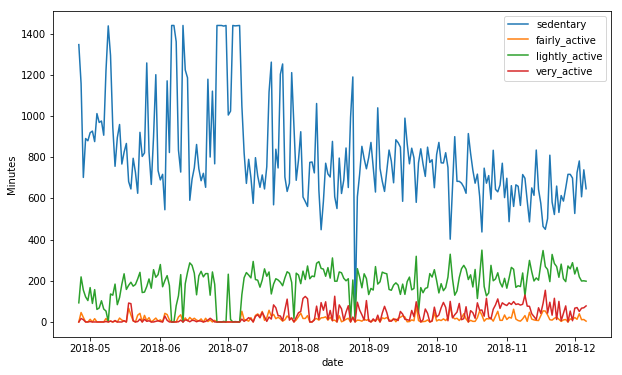

In [85]:
plt.figure(figsize=(10,6))
sns.lineplot(x=fitbit.date, y=fitbit.minutes_sedentary, label='sedentary')
sns.lineplot(x=fitbit.date, y=fitbit.minutes_fairly_active, label='fairly_active')
sns.lineplot(x=fitbit.date, y=fitbit.minutes_lightly_active, label='lightly_active')
sns.lineplot(x=fitbit.date, y=fitbit.minutes_very_active, label='very_active')
plt.ylabel('Minutes')
plt.show()

In [64]:
fitbit['day_of_week'] = fitbit.date.dt.day_name()

In [65]:
fitbit['weekend_or_weekday'] = fitbit.day_of_week.str.startswith('S')

In [67]:
fitbit.loc[fitbit.weekend_or_weekday == True, 'weekend_or_weekday'] = 'weekend'
fitbit.loc[fitbit.weekend_or_weekday == False, 'weekend_or_weekday'] = 'weekday'

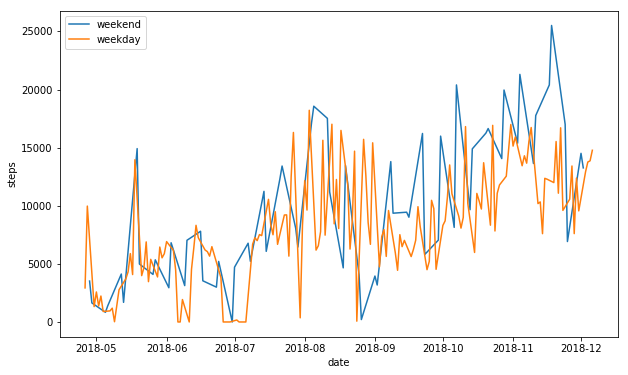

In [72]:
weekend = fitbit.loc[fitbit.weekend_or_weekday == 'weekend']
weekday = fitbit.loc[fitbit.weekend_or_weekday == 'weekday']

plt.figure(figsize=(10, 6))
sns.lineplot(data=weekend, x=weekend.date, y=weekend.steps, label='weekend')
sns.lineplot(data=weekday, x=weekday.date, y=weekday.steps, label='weekday')

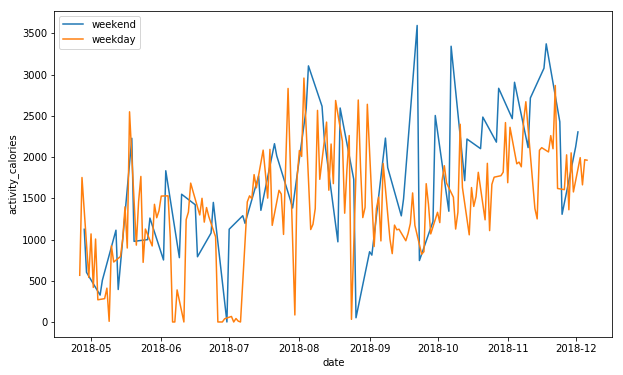

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekend, x=weekend.date, y=weekend.activity_calories, label='weekend')
sns.lineplot(data=weekday, x=weekday.date, y=weekday.activity_calories, label='weekday')

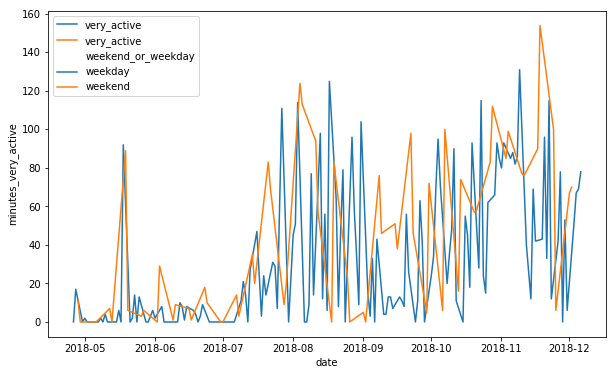

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=fitbit.date, y=fitbit.minutes_very_active, label='very_active', hue=fitbit.weekend_or_weekday)

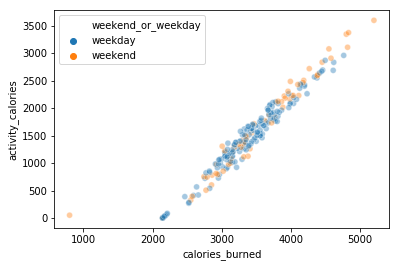

In [79]:
sns.scatterplot(x=fitbit.calories_burned, y=fitbit.activity_calories, hue=fitbit.weekend_or_weekday, alpha=.4)